In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk 
import numpy as np
import os
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [109]:
pd.set_option('display.max_columns', None)

In [145]:
# Create a custom function for data transformation
features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output  

In [208]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
#df1 = df1[features]
df1 = df_transformation(df1)

C:\Users\kanev\AppData\Local\Temp\ipykernel_16144\1488056606.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [209]:
df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
#df2 = df2[features]
df2 = df_transformation(df2)

C:\Users\kanev\AppData\Local\Temp\ipykernel_16144\1488056606.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [210]:
df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
#df3 = df3[features]
df3 = df_transformation(df3)

C:\Users\kanev\AppData\Local\Temp\ipykernel_16144\1488056606.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [211]:
len(df1)+len(df2)+len(df3)

3952

In [212]:
df = pd.concat([df1,df2,df3]).reset_index()
len(df)

3952

In [213]:
df

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,roll,yaw,angleOfAttack,flightPathAngle,verticalFlightPathAngle,horizontalFlightPathAngle,rollAcceleration,pitchAcceleration,yawAcceleration,e1N1ng,e2N1ng,e1N2nf,e2N2nf,mainRotorRpm,tailRotorRpm,mainRotorTorque,e1Itt,e2Itt,mainRotorInducedInflow,flightDirectorPitch,flightDirectorRoll,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,0,2022-09-19 20:01:09,39.358996,-74.434692,0.032500,343.437625,331.099250,0.137500,0.205666,0.219875,0.278250,331.373625,1.574125,0.0,0.257875,331.099250,-4.041994,-1.269124,-0.730988,51.436875,51.436875,98.242750,98.242750,0.606367,3.368717,-21.172125,68.890875,68.890875,-26.476875,0.290625,0.635875,0.582125,1.000000,-0.195750,24.912250,-4.404250,3.726000,-38.213000,7.283500,-5.219500,-5.219500
1,1,2022-09-19 20:01:10,39.358996,-74.434692,0.054773,341.506909,329.168455,0.155500,0.170178,-0.247591,0.044932,329.445955,-1.753000,0.0,-0.197500,329.168455,0.493045,0.525428,0.610265,58.727477,58.727477,92.516341,92.516341,0.588720,3.270668,-19.832068,296.786568,296.786568,-33.095409,-0.196682,0.406386,2.061705,1.000000,-0.824295,0.949909,1.013386,3.726000,-38.213000,39.997136,-3.727205,-3.727205
2,2,2022-09-19 20:01:11,39.358996,-74.434692,0.060000,341.011659,328.673114,0.018477,0.019431,-0.172818,-0.102977,328.950159,0.529659,0.0,-0.119591,328.673114,0.017623,-0.004922,0.055029,70.974841,70.974841,91.225750,91.225750,0.565812,3.143395,-8.129818,492.122841,492.122841,-27.582932,-0.119955,0.258500,1.114295,1.000000,-0.669841,-0.176841,0.624068,3.726000,-38.216068,87.756318,6.978659,6.978659
3,3,2022-09-19 20:01:12,39.358996,-74.434692,0.060000,341.334978,328.996422,0.005200,0.005306,-0.167422,-0.149267,329.273400,0.004778,0.0,-0.116156,328.996422,0.002307,-0.005156,-0.010993,81.245956,81.245956,91.185044,91.185044,0.557039,3.094659,23.278067,548.774533,548.774533,-25.925644,-0.116222,0.211444,0.181933,1.000000,-0.309289,0.039356,0.124244,3.726000,-38.228200,100.000000,28.398222,28.398222
4,4,2022-09-19 20:01:13,39.358996,-74.434692,0.060000,341.558604,329.220042,0.002542,0.002629,-0.172063,-0.150312,329.497063,0.043229,0.0,-0.122250,329.220042,0.001535,0.001055,-0.024445,88.309938,88.309938,92.883333,92.883333,0.567882,3.154911,53.377396,572.406104,572.406104,-26.168917,-0.122229,0.210375,-0.000208,1.000000,-0.118042,0.065479,0.052958,3.726000,-38.282792,100.000000,56.248208,56.248208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,1312,2022-09-19 22:13:39,39.880639,-75.226289,0.130000,358.731000,346.676000,0.000000,0.000000,1.045620,0.078000,346.818920,-0.006440,0.0,1.455840,346.676000,0.000020,-0.000311,0.000002,80.164000,80.164000,100.000000,100.000000,0.610867,3.393700,26.617260,537.835480,537.835480,-28.515000,1.455000,0.164000,0.003080,0.000000,0.000000,35.880560,-0.327840,3.760000,-25.606000,46.294000,39.719760,39.719760
3948,1313,2022-09-19 22:13:40,39.880639,-75.226289,0.131200,358.688300,346.633300,0.012440,0.012490,1.048880,0.072880,346.776140,-0.927940,0.0,1.459340,346.633300,0.000923,0.011827,-0.090184,77.373980,77.373980,99.791360,99.791360,0.609364,3.385353,12.847320,525.879140,525.879140,-28.486960,1.455000,0.164000,0.005680,0.000000,-0.015900,35.667180,-0.170200,3.759300,-25.606000,26.850520,30.480700,30.480700
3949,1314,2022-09-19 22:13:41,39.880639,-75.226289,0.138750,358.165396,346.110333,0.017917,0.018836,1.068812,0.063062,346.253146,-0.708375,0.0,1.480021,346.110333,-0.004292,-0.039495,0.100812,58.680604,58.680604,94.733167,94.733167,0.590836,3.282424,-13.985958,493.885000,493.885000,-27.725479,1.455000,0.164000,0.134792,0.000000,-0.173458,35.856792,-0.273375,3.757000,-25.606000,0.000000,-3.314687,-3.314687
3950,1315,2022-09-1

In [232]:
#normalize values 
df_norm = df.loc[:, df.columns != 'datetime']
df_norm = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm.insert(1, 'datetime', df[['datetime']])

In [233]:
#Add columns for surface and hover taxi maneuvers and default set value to zero
df['Surface_Taxi'] = 0
df['Hover_Taxi'] = 0
df['Quick_Stop'] = 0

In [234]:
#Add columns for surface and hover taxi maneuvers and default set value to zero
df_norm['Surface_Taxi'] = 0
df_norm['Hover_Taxi'] = 0
df_norm['Quick_Stop'] = 0

In [235]:
#label data points
df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 80
df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 80

In [236]:
#label data points
df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1

[Text(0.5, 1.0, 'Correlation Heatmap')]

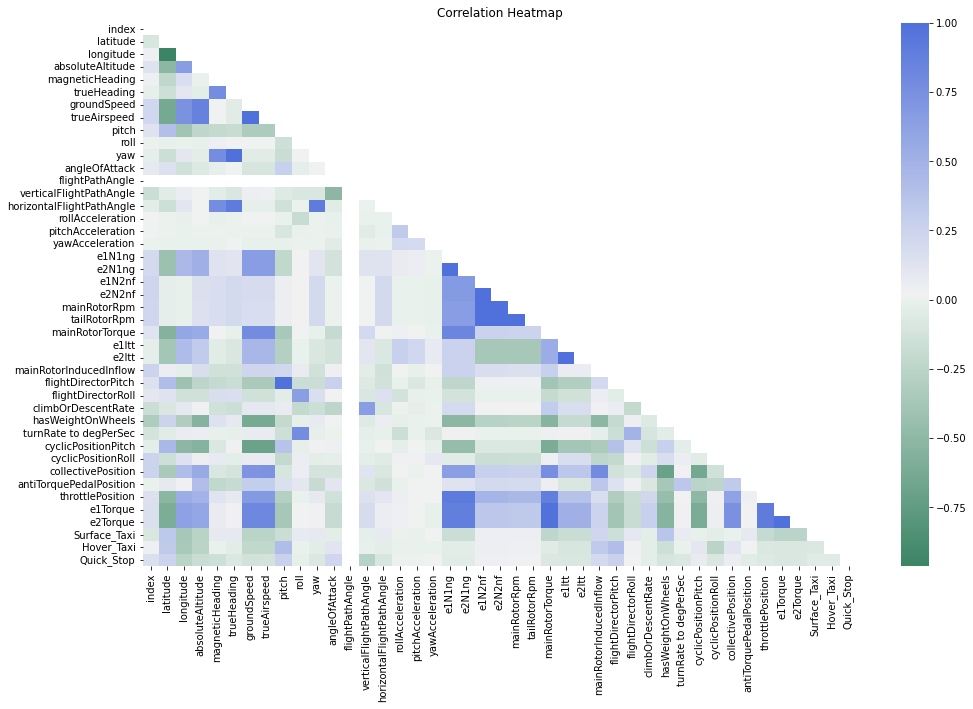

In [195]:
#correlation heatmap
df_corr = df.corr()
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(150, 260, as_cmap=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, cmap=cmap).set(title = 'Correlation Heatmap')

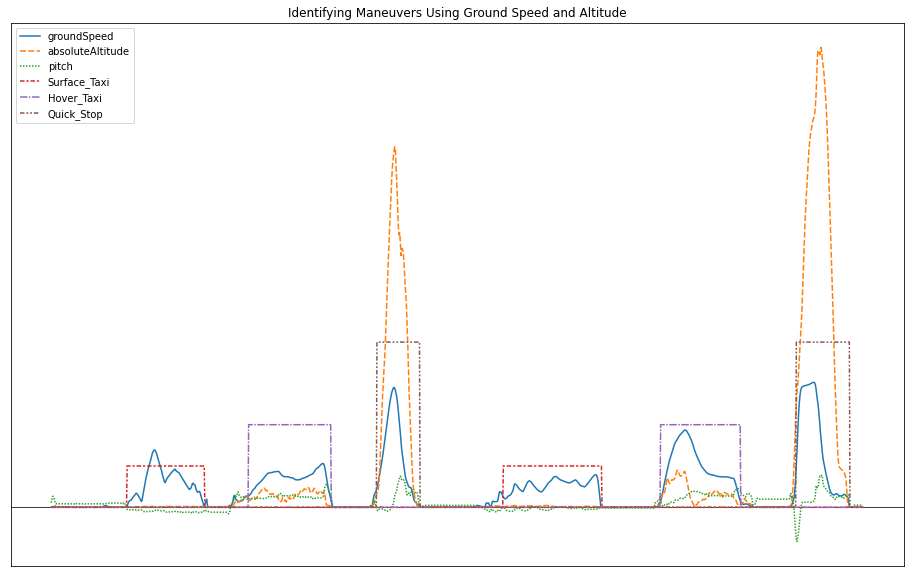

In [290]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df_groundspd_alt = df.loc[(df['datetime'].between('2022-09-19 21:50:45' , '2022-09-19 22:25:25', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

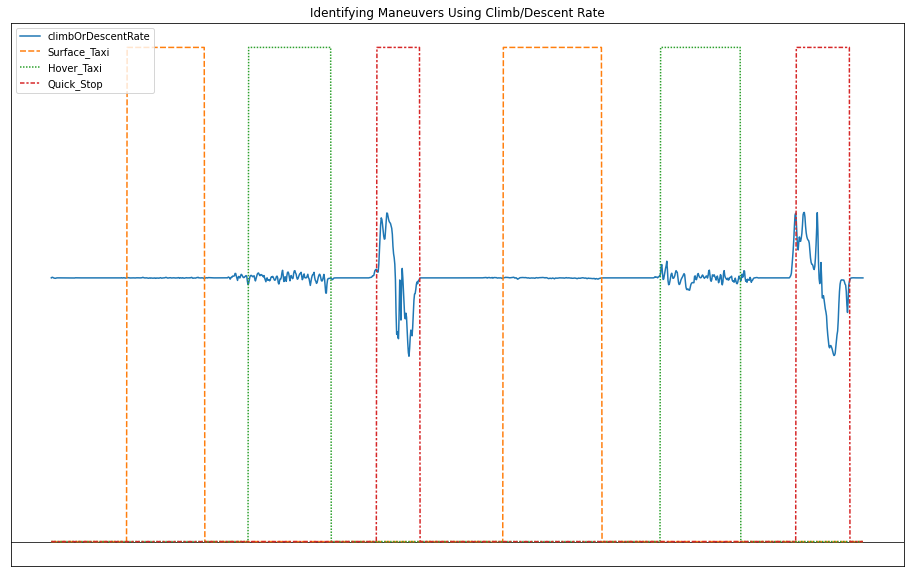

In [286]:
#Plot Ground Speed vs altitude over time
df_climb_desc = df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:50:45' , '2022-09-19 22:25:25' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

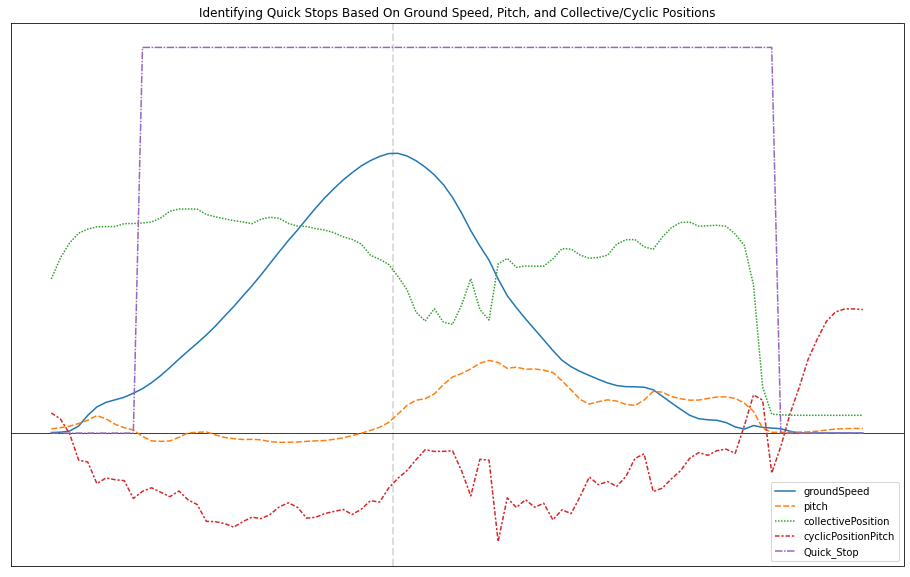

In [302]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, and Altitude Changes
df_qs = df.loc[(df['datetime'].between('2022-09-19 22:00:25' , '2022-09-19 22:01:54' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axvline(3190.5, c = 'lightgrey', dashes = (5, 2))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

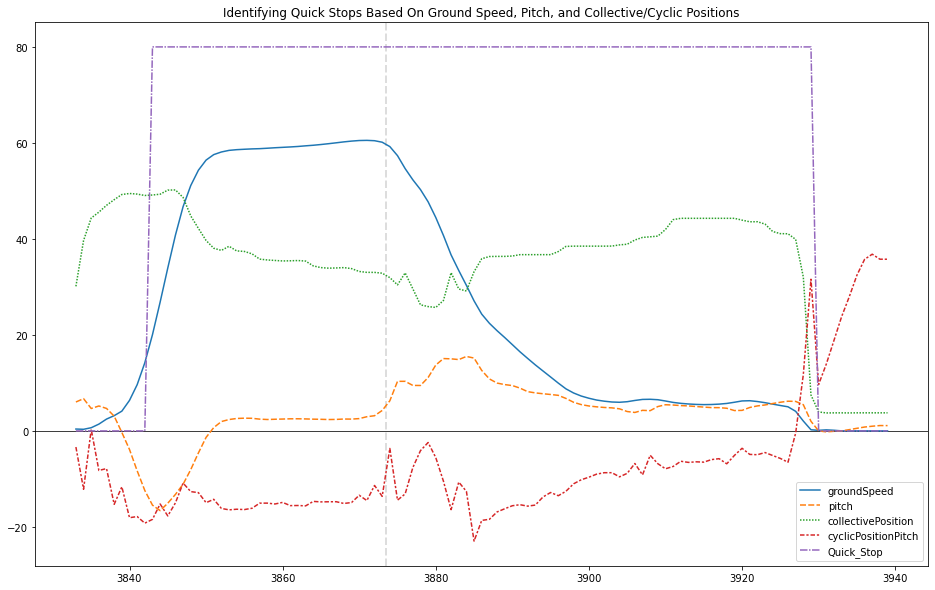

In [301]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, and Altitude Changes
df_qs = df.loc[(df['datetime'].between('2022-09-19 22:11:45' , '2022-09-19 22:13:31' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axvline(3873.5, c = 'lightgrey', dashes = (5, 2))
plt.axhline(0, c = 'black', lw = 0.75)
#plt.xticks([])
#plt.yticks([])
p = sns.lineplot(data = df_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')